a**Semestral Project**

- Picking a set of known biologically active structures, loading and processing it using RDkit
- Performing a basic analysis of the set, descriptors, scaffolds, fingerprints, similarities, etc.
- Comparing the properties of your picked set with other sets
- Trying out some standard cheminformatic methods on the sets
- Preparing set visualizations
-Making a basic classifier related to your picked and prepared dataset

As for my set of biologically active structures, I have chosen compounds associated with Progesterone receptor (Homo Sapiens). I have downloaded the set of these compounds in a csv format from CHEMBL. Firstly, I will load all necessary libraries (mainly RDKit)

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)
from rdkit.Chem import rdMolDescriptors as rdescriptors
import seaborn as sns
from rdkit.Chem import Descriptors
import csv
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import Lipinski

In [3]:
df = pd.read_csv("/Users/emafialova/cdd2025/DOWNLOAD-WTl0OYURRhsZVjmHtvPqC2eakuFMltzG5pT_VyAGucA=.csv", sep="\";\"")
df.head()

/var/folders/vs/jvlkzzgs5qng_qg2lf5q2zwr0000gn/T/ipykernel_24246/3552242774.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/Users/emafialova/cdd2025/DOWNLOAD-WTl0OYURRhsZVjmHtvPqC2eakuFMltzG5pT_VyAGucA=.csv", sep="\";\"")


,"""ChEMBL ID",Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,Inchi,Withdrawn Flag,Orphan,Records Key,"Records Name"""
0,"""CHEMBL48361",DABIGATRAN,BIBR 953 ZW|BIBR-953|BIBR-953-ZW|DABIGATRAN|PR...,Small molecule,3.0,471.52,88,164,2.99,150.22,...,-1.54,ZWITTERION,C25H25N7O3,Cn1c(CNc2ccc(C(=N)N)cc2)nc2cc(C(=O)N(CCC(=O)O)...,YBSJFWOBGCMAKL-UHFFFAOYSA-N,InChI=1S/C25H25N7O3/c1-31-20-10-7-17(25(35)32(...,False,0,"['Dabigatran', '24, Dabigatran', 'DABIGATRAN',...","['Dabigatran', '3-({2-[(4-Carbamimidoyl-phenyl..."
1,"""CHEMBL492",ETIDOCAINE,ETIDOCAINA|ETIDOCAINE|Etidocaine|W-19053|W-190...,Small molecule,4.0,276.42,69,88,3.75,32.34,...,-1.39,BASE,C17H28N2O,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,VTUSIVBDOCDNHS-UHFFFAOYSA-N,InChI=1S/C17H28N2O/c1-6-12-19(8-3)15(7-2)17(20...,False,0,"['35', 'Etidocaine', 'SID144206521', '26', 'Et...","['N-(2,6-Dimethyl-phenyl)-2-(ethyl-propyl-amin..."
2,"""CHEMBL878",METOLAZONE,DIULO|METAZOLINE|METENIX|METOLAZONA|METOLAZONE...,Small molecule,4.0,365.84,165,562,2.71,92.50,...,-1.18,NEUTRAL,C16H16ClN3O3S,Cc1ccccc1N1C(=O)c2cc(S(N)(=O)=O)c(Cl)cc2NC1C,AQCHWTWZEMGIFD-UHFFFAOYSA-N,InChI=1S/C16H16ClN3O3S/c1-9-5-3-4-6-14(9)20-10...,False,0,"['Metolazone', 'Metolazone', 'Metolazone', 'NC...","['7-Chloro-2-methyl-4-oxo-3-o-tolyl-1,2,3,4-te..."
3,"""CHEMBL1371200",CANRENOATE POTASSIUM,CANRENOATE DE POTASSIUM|CANRENOATE POTASSIUM|C...,Small molecule,4.0,396.57,65,80,3.89,74.60,...,2.38,ACID,C22H29KO4,C[C@]12CCC(=O)C=C1C=C[C@@H]1[C@@H]2CC[C@@]2(C)...,JTZQCHFUGHIPDF-RYVBEKKQSA-M,InChI=1S/C22H30O4.K/c1-20-9-5-15(23)13-14(20)3...,False,0,"['CANRENOATE POTASSIUM', 'CANRENOIC ACID, POTA...","['CANRENOATE POTASSIUM', 'CANRENOIC ACID, POTA..."
4,"""CHEMBL2354444",PIRARUBICIN,"ADRIAMYCIN, TETRAHYDROPYRANYL|PIRARUBICIN|PIRA...",Small molecule,3.0,627.64,58,130,1.55,204.30,...,1.51,BASE,C32H37NO12,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,KMSKQZKKOZQFFG-YXRRJAAWSA-N,InChI=1S/C32H37NO12/c1-14-31(45-21-8-3-4-9-42-...,False,0,"['PIRARUBICIN', 'THP (THP-Doxorubicin)', 'SID5...","['PIRARUBICIN', '10-[4-Amino-6-methyl-5-(tetra..."


In [4]:
df2 = df.fillna(-1)
# Filter rows where the "Smiles" column is NOT equal to -1
df_pr_smiles = df2[df2["Smiles"] != -1]
df_pr_smiles

,"""ChEMBL ID",Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,Inchi,Withdrawn Flag,Orphan,Records Key,"Records Name"""
0,"""CHEMBL48361",DABIGATRAN,BIBR 953 ZW|BIBR-953|BIBR-953-ZW|DABIGATRAN|PR...,Small molecule,3.0,471.52,88,164,2.99,150.22,...,-1.54,ZWITTERION,C25H25N7O3,Cn1c(CNc2ccc(C(=N)N)cc2)nc2cc(C(=O)N(CCC(=O)O)...,YBSJFWOBGCMAKL-UHFFFAOYSA-N,InChI=1S/C25H25N7O3/c1-31-20-10-7-17(25(35)32(...,False,0,"['Dabigatran', '24, Dabigatran', 'DABIGATRAN',...","['Dabigatran', '3-({2-[(4-Carbamimidoyl-phenyl..."
1,"""CHEMBL492",ETIDOCAINE,ETIDOCAINA|ETIDOCAINE|Etidocaine|W-19053|W-190...,Small molecule,4.0,276.42,69,88,3.75,32.34,...,-1.39,BASE,C17H28N2O,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,VTUSIVBDOCDNHS-UHFFFAOYSA-N,InChI=1S/C17H28N2O/c1-6-12-19(8-3)15(7-2)17(20...,False,0,"['35', 'Etidocaine', 'SID144206521', '26', 'Et...","['N-(2,6-Dimethyl-phenyl)-2-(ethyl-propyl-amin..."
2,"""CHEMBL878",METOLAZONE,DIULO|METAZOLINE|METENIX|METOLAZONA|METOLAZONE...,Small molecule,4.0,365.84,165,562,2.71,92.50,...,-1.18,NEUTRAL,C16H16ClN3O3S,Cc1ccccc1N1C(=O)c2cc(S(N)(=O)=O)c(Cl)cc2NC1C,AQCHWTWZEMGIFD-UHFFFAOYSA-N,InChI=1S/C16H16ClN3O3S/c1-9-5-3-4-6-14(9)20-10...,False,0,"['Metolazone', 'Metolazone', 'Metolazone', 'NC...","['7-Chloro-2-methyl-4-oxo-3-o-tolyl-1,2,3,4-te..."
3,"""CHEMBL1371200",CANRENOATE POTASSIUM,CANRENOATE DE POTASSIUM|CANRENOATE POTASSIUM|C...,Small molecule,4.0,396.57,65,80,3.89,74.60,...,2.38,ACID,C22H29KO4,C[C@]12CCC(=O)C=C1C=C[C@@H]1[C@@H]2CC[C@@]2(C)...,JTZQCHFUGHIPDF-RYVBEKKQSA-M,InChI=1S/C22H30O4.K/c1-20-9-5-15(23)13-14(20)3...,False,0,"['CANRENOATE POTASSIUM', 'CANRENOIC ACID, POTA...","['CANRENOATE POTASSIUM', 'CANRENOIC ACID, POTA..."
4,"""CHEMBL2354444",PIRARUBICIN,"ADRIAMYCIN, TETRAHYDROPYRANYL|PIRARUBICIN|PIRA...",Small molecule,3.0,627.64,58,130,1.55,204.30,...,1.51,BASE,C32H37NO12,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,KMSKQZKKOZQFFG-YXRRJAAWSA-N,InChI=1S/C32H37NO12/c1-14-31(45-21-8-3-4-9-42-...,False,0,"['PIRARUBICIN', 'THP (THP-Doxorubicin)', 'SID5...","['PIRARUBICIN', '10-[4-Amino-6-methyl-5-(tetra..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628,"""CHEMBL9967",PIRENZEPINE,ACI-91|GASTRI P|GASTROZEPIN|PIRENZEPINA|PIRENZ...,Small molecule,4.0,351.41,78,344,1.56,68.78,...,-1.04,NEUTRAL,C19H21N5O2,CN1CCN(CC(=O)N2c3ccccc3C(=O)Nc3cccnc32)CC1,RMHMFHUVIITRHF-UHFFFAOYSA-N,InChI=1S/C19H21N5O2/c1-22-9-11-23(12-10-22)13-...,False,0,"['1', 'pirenzepine', 'pirenzepine', 'Pirenzepi...","['11-[2-(4-Methyl-piperazin-1-yl)-acetyl]-5,11..."
4629,"""CHEMBL2107831",LUSUTROMBOPAG,LUSUTROMBOPAG|LUSUTROMBOPAG |MULPLETA|Mulpleo ...,Small molecule,4.0,591.56,35,42,8.52,97.75,...,-0.73,ACID,C29H32Cl2N2O5S,CCCCCCO[C@@H](C)c1cccc(-c2csc(NC(=O)c3cc(Cl)c(...,NOZIJMHMKORZBA-KJCUYJGMSA-N,InChI=1S/C29H32Cl2N2O5S/c1-5-6-7-8-12-38-18(3)...,False,0,"['LUSUTROMBOPAG', 'Lusutrombopag', 'LUSUTROMBO...","['LUSUTROMBOPAG', 'Lusutrombopag', 'LUSUTROMBO..."
4630,"""CHEMBL360328",LORCASERIN,LORCASERIN|LORCASERINA|LORCASERINE,Small molecule,4.0,195.69,60,232,2.59,12.03,...,-0.33,BASE,C11H14ClN,C[C@H]1CNCCc2ccc(Cl)cc21,XTTZERNUQAFMOF-QMMMGPOBSA-N,InChI=1S/C11H14ClN/c1-8-7-13-5-4-9-2-3-10(12)6...,True,0,"['(R)-15', '7', '7d (R), Lorcaserin, APD356', ...","['(R)-8-Chloro-1-methyl-2,3,4,5-tetrahydro-1H-..."
4631,"""CHEMBL23",DILTIAZEM,Cardizem|DILTIAZEM|DILTIAZEM EXTENDED RELEASE|...,Small molecule,4.0,414.53,254,2537,3.37,59.08,...,-0.13,NEUTRAL,C22H26N2O4S,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,HSUGRBWQSSZJOP-RTWAWAEBSA-N,InChI=1S/C22H26N2O4S/c1-15(25)28-20-21(16-9-11...,False,0,"['diltiazem', 'Diltiazem', 'diltiazem', 'Dilti...",['diltiazem;Acetic acid 5-(2-dimethylamino-eth...


In [5]:
df_smiles_list = [Chem.MolFromSmiles(smiles) for smiles in df_pr_smiles["Smiles"]]

b) Performing a basic analysis of the set
- descriptors
- scaffolds
- similarities
- fingerprints

In [6]:
def get_descriptors(smiles_list):
    mw = [rdescriptors.CalcExactMolWt(mol) for mol in smiles_list]
    HA = [Lipinski.NumHAcceptors(mol) for mol in smiles_list]
    HD = [Lipinski.NumHDonors(mol) for mol in smiles_list]
    log_P = [Chem.Crippen.MolLogP(mol) for mol in smiles_list]
    atoms = [rdescriptors.CalcNumHeavyAtoms(mol) for mol in smiles_list]
    rings = [rdescriptors.CalcNumRings(mol) for mol in smiles_list]
    return mw, HA, HD, log_P, atoms, rings


In [7]:
#df_smiles_list = list(Chem.MolFromSmiles(smiles) for smiles in df_pr_smiles)
pr_mw, pr_HA, pr_HD, pr_logP, pr_atoms, pr_rings = get_descriptors(df_smiles_list)

/var/folders/vs/jvlkzzgs5qng_qg2lf5q2zwr0000gn/T/ipykernel_24246/2822618771.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot([pr_mw, pr_HA, pr_HD, pr_logP, pr_atoms, pr_rings], showfliers = False).set(xticklabels = ["pr_mw", "pr_HA", "pr_HD", "pr_logP", "pr_atoms", "pr_rings"])


[[Text(0, 0, 'pr_mw'),
  Text(1, 0, 'pr_HA'),
  Text(2, 0, 'pr_HD'),
  Text(3, 0, 'pr_logP'),
  Text(4, 0, 'pr_atoms'),
  Text(5, 0, 'pr_rings')]]

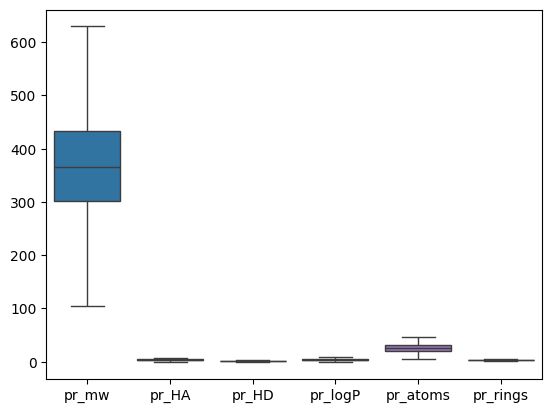

In [8]:
sns.boxplot([pr_mw, pr_HA, pr_HD, pr_logP, pr_atoms, pr_rings], showfliers = False).set(xticklabels = ["pr_mw", "pr_HA", "pr_HD", "pr_logP", "pr_atoms", "pr_rings"])

This probably isn't a practical visualization as the molecular weights of all molecules are above 100 and all other descriptors are much lower.

For better visualization, I will remove this one boxplot.

/var/folders/vs/jvlkzzgs5qng_qg2lf5q2zwr0000gn/T/ipykernel_24246/1946346267.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot([pr_HA, pr_HD, pr_logP, pr_atoms, pr_rings], showfliers = False).set(xticklabels = ["pr_HA", "pr_HD", "pr_logP", "pr_atoms", "pr_rings"])


[[Text(0, 0, 'pr_HA'),
  Text(1, 0, 'pr_HD'),
  Text(2, 0, 'pr_logP'),
  Text(3, 0, 'pr_atoms'),
  Text(4, 0, 'pr_rings')]]

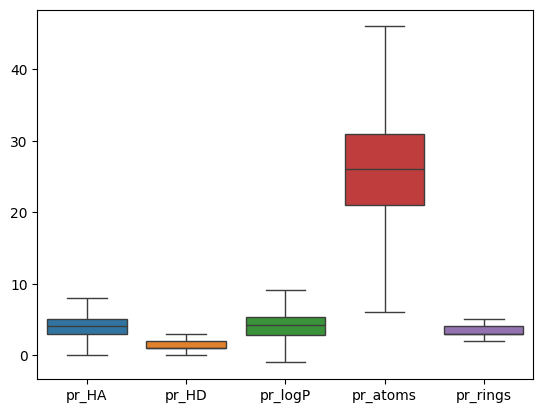

In [9]:
sns.boxplot([pr_HA, pr_HD, pr_logP, pr_atoms, pr_rings], showfliers = False).set(xticklabels = ["pr_HA", "pr_HD", "pr_logP", "pr_atoms", "pr_rings"])

I think it would be also nice to see the descriptors of theis set compared to descriptors of another set. For the comparison, I will choose two sets that we have previously worked with: drugbank.sdf and mtor set.

In [31]:
df_mtor_full = pd.read_csv("/Users/emafialova/cdd2025/data/chembl_mtor_ic50.csv", sep=";")
df_mtor = df_mtor_full["Smiles"]
mtor = list(Chem.MolFromSmiles(smiles) for smiles in df_mtor)

In [11]:
mtor_mw, mtor_HA, mtor_HD, mtor_logP, mtor_atoms, mtor_rings = get_descriptors(mtor)

In [12]:
desc_names = ['ExactMolWt', 'HAcceptors', 'HDonors', 'LogP', 'HeavyAtoms', 'Rings']
sets = {'PR': df_smiles_list, 'MTOR': mtor}
all_data = []

for label, smiles in sets.items():
    descriptors = get_descriptors(smiles)
    for name, values in zip(desc_names, descriptors):
        for val in values:
            all_data.append({
                'Descriptor': name,
                'Value': val,
                'Dataset': label
            })

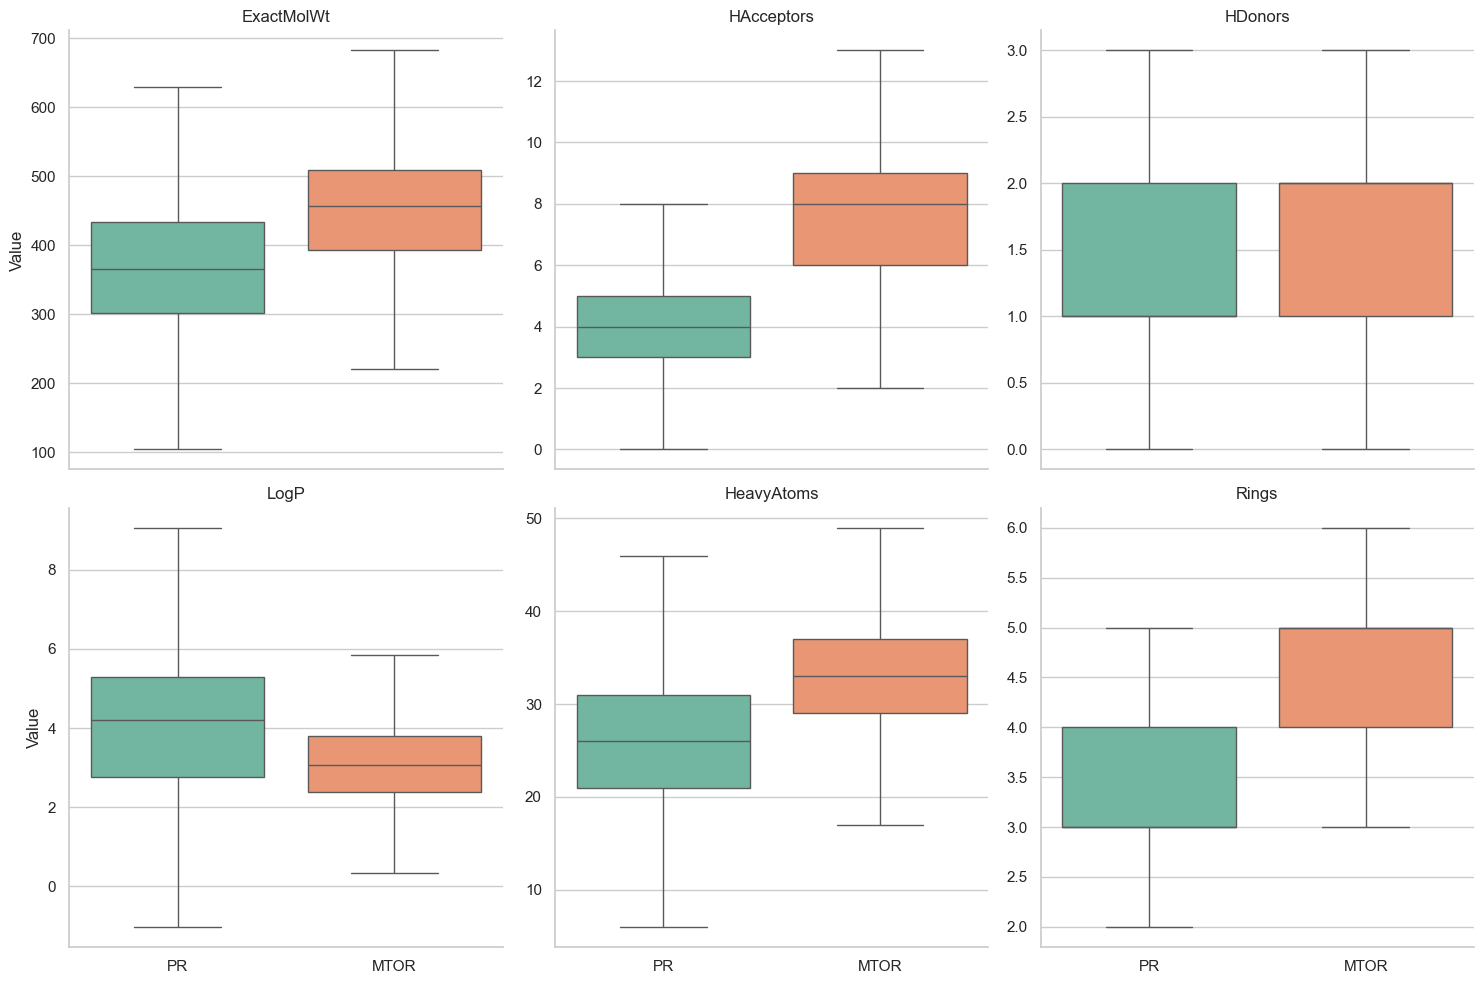

In [ ]:
import matplotlib.pyplot as plt
df = pd.DataFrame(all_data)
# Set style
sns.set(style="whitegrid")

# Create the FacetGrid with 2 columns
g = sns.catplot(
    data=df, 
    x='Dataset', 
    y='Value', 
    hue='Dataset',
    col='Descriptor', 
    kind='box', 
    col_wrap=3, 
    palette='Set2', 
    sharey=False,
    showfliers = False
)

g.set_titles("{col_name}")
g.set_axis_labels("", "Value")
plt.tight_layout()
plt.show()

I think its safe to say that mtor dataset and my dataset are very similar.

Now for the scaffolds, I will be using the Murcko Scaffold from RdKit:

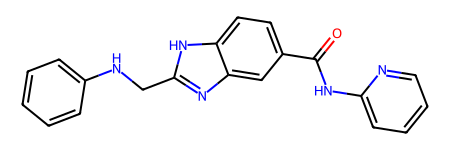

In [16]:
from rdkit.Chem.Scaffolds import MurckoScaffold
scaffold1 = MurckoScaffold.GetScaffoldForMol(df_smiles_list[0])
scaffold1

I prepared a function that I can later use on all avaiable smiles:

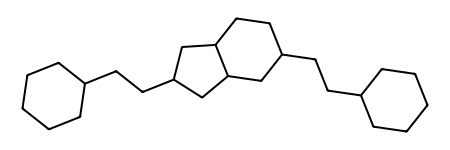

In [17]:
def get_scaffold(input_molecule):
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(input_molecule) # all atoms->C all bonds-> single
    except ValueError: 
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff
get_scaffold(df_smiles_list[0])

In [18]:
pr_scaffolds = [get_scaffold(mol) for mol in df_smiles_list]
pr_scaffolds[:5]

In [19]:
pr_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(pr_scaffolds) if mol]
pr_scaffolds_smiles[:5]

[(0, 'C1CCC(CCC2CCC3CC(CCC4CCCCC4)CC3C2)CC1'),
 (1, 'C1CCCCC1'),
 (2, 'C1CCC(C2CCC3CCCCC3C2)CC1'),
 (3, 'C1CCC2C(C1)CCC1C3CCCC3CCC21'),
 (4, 'C1CCC(CC2CCC(CC3CCCC4CC5CC6CCCCC6CC5CC34)CC2)CC1')]

I have saved the scaffold information into a dctionart with structure:

key: value = scaffold smiles: [molecules] 

In [20]:
from collections import defaultdict
pr_scaffolds_dict = defaultdict(list)
for i, scaffold in pr_scaffolds_smiles:
    pr_scaffolds_dict[scaffold].append(i)
print(pr_scaffolds_dict)

defaultdict(<class 'list'>, {'C1CCC(CCC2CCC3CC(CCC4CCCCC4)CC3C2)CC1': [0, 3462], 'C1CCCCC1': [1, 14, 18, 29, 49, 64, 73, 76, 78, 80, 82, 91, 92, 98, 101, 110, 123, 127, 128, 135, 136, 140, 165, 178, 184, 198, 211, 215, 223, 232, 237, 238, 244, 248, 249, 256, 299, 397, 471, 569, 708, 726, 805, 903, 928, 956, 1191, 1301, 1335, 1433, 1434, 1456, 1495, 1538, 1560, 1752, 1787, 1976, 2109, 2187, 2358, 2498, 2542, 2663, 2672, 2685, 2691, 2692, 2702, 2703, 2715, 2735, 2744, 2746, 2761, 2764, 2766, 2773, 2813, 2825, 2875, 3004, 3006, 3007, 3008, 3012, 3030, 3053, 3061, 3069, 3073, 3078, 3112, 3116, 3125, 3135, 3148, 3150, 3152, 3154, 3160, 3162, 3170, 3173, 3220, 3222, 3229, 3231, 3235, 3237, 3239, 3255, 3465, 3473, 3477, 3486, 3492, 3493, 3508, 3513, 3518, 3519, 3527, 3541, 3549, 3554, 3559, 3571, 3577, 3601, 3617, 3624, 3636, 3642, 3658, 3668, 3673, 3688, 3695, 3700, 3707, 3712, 3716, 3717, 3721, 3726, 3728, 3732, 3752, 3774, 3781, 3798, 3800, 3801, 3809, 3810, 3814, 3850, 3862, 3866, 3867, 3

In [22]:
mtor_scaffolds = [get_scaffold(mol) for mol in mtor]
mtor_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(mtor_scaffolds) if mol]
mtor_scaffolds_dict = defaultdict(list)
for i, scaffold in mtor_scaffolds_smiles:
    mtor_scaffolds_dict[scaffold].append(i)
print(mtor_scaffolds_dict)

defaultdict(<class 'list'>, {'C1CCC(CCC2CCCC(C3CCC4CCCC4C3)C2)CC1': [0, 1, 2, 3, 4, 5, 6, 25, 26, 30, 91, 92, 93, 94, 95, 96, 306, 307, 426, 428, 493, 549, 602, 604, 607, 833, 834, 927, 933, 945, 946, 978, 1143, 1158, 1181, 1198, 1220, 1245, 1247, 1248, 1249, 1250, 1266, 1328, 1329, 1351, 1352, 1353, 1354, 1356, 1378, 1387, 1388, 1389, 1508, 1513, 1515, 1516, 1583], 'C1CCC(C2CCC3CCC(C4CCCCC4)C3C2)CC1': [7, 777, 1066, 1072, 1397, 1772, 1774, 2166, 2171, 2174, 2497, 3480, 3481, 3996], 'C1CCC(CC2CCC3CCC(C4CCCCC4)CC32)CC1': [8, 125, 412, 413, 415, 472, 848, 907, 917, 918, 950, 1077, 1394, 1395, 1396, 1398, 1399, 1729, 2165, 2592, 2593, 3179], 'C1CCC(CC2CCC3CCC(C4CCC5CCCC5C4)CC32)CC1': [9, 10, 124, 127, 128, 471, 473, 474, 530, 532, 533, 776, 915, 919, 1901, 1902, 2167, 2615], 'C1CCC2C(C1)CCC1C3CCCC3CCC21': [11, 187, 190, 191, 192, 193, 383, 388, 389, 521, 631, 632, 633, 1080, 1085, 1437, 1618, 1619, 1620, 1621, 1641, 1645], 'C1CCC(C2CCC(C3CCCC4CCC5CCC(C6CCC7CCCCC7C6)CC5C43)CC2)CC1': [12, 1

Now I will sort the scaffold by number of occurences (length of the value list) and I will visualize the top 10 most common ones for both my dataset (pr) and mtor dataset:

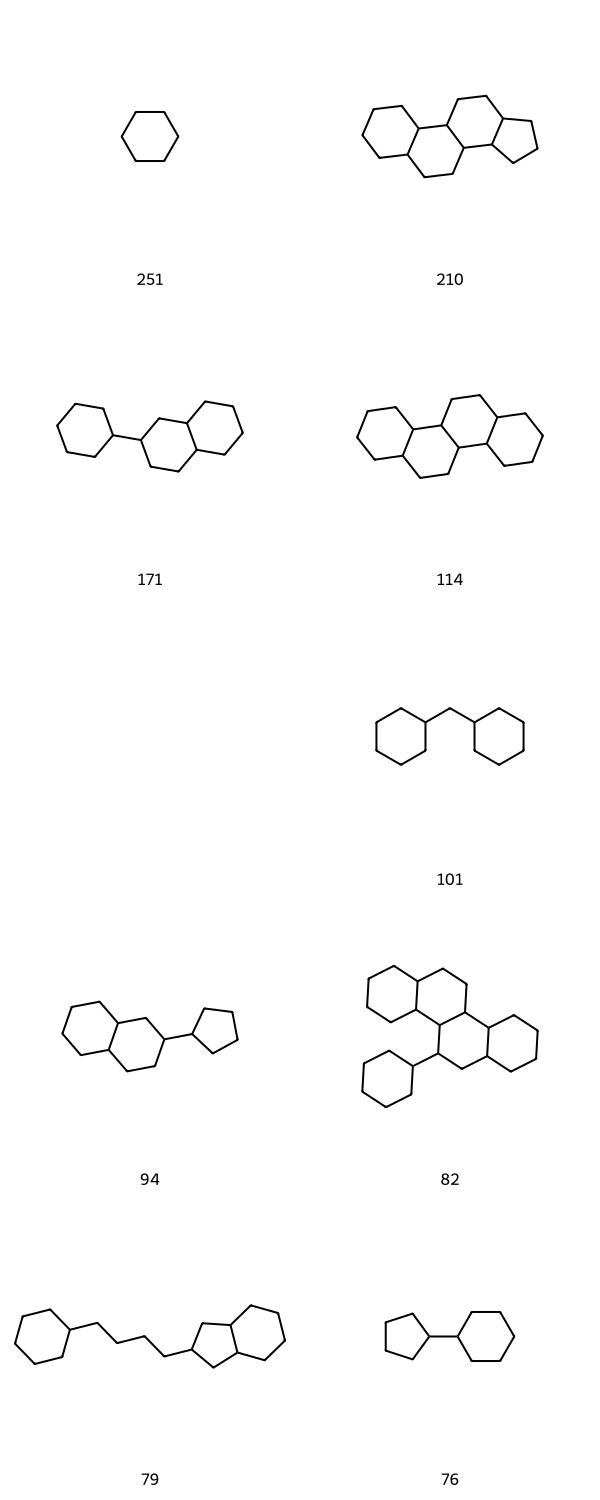

In [23]:
pr_scaffolds_sorted = [(scaffold, len(ligands)) for scaffold, ligands in pr_scaffolds_dict.items()]
pr_scaffolds_sorted.sort(key=lambda x: x[1], reverse=True)

Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in pr_scaffolds_sorted[:10]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in pr_scaffolds_sorted[:10]])

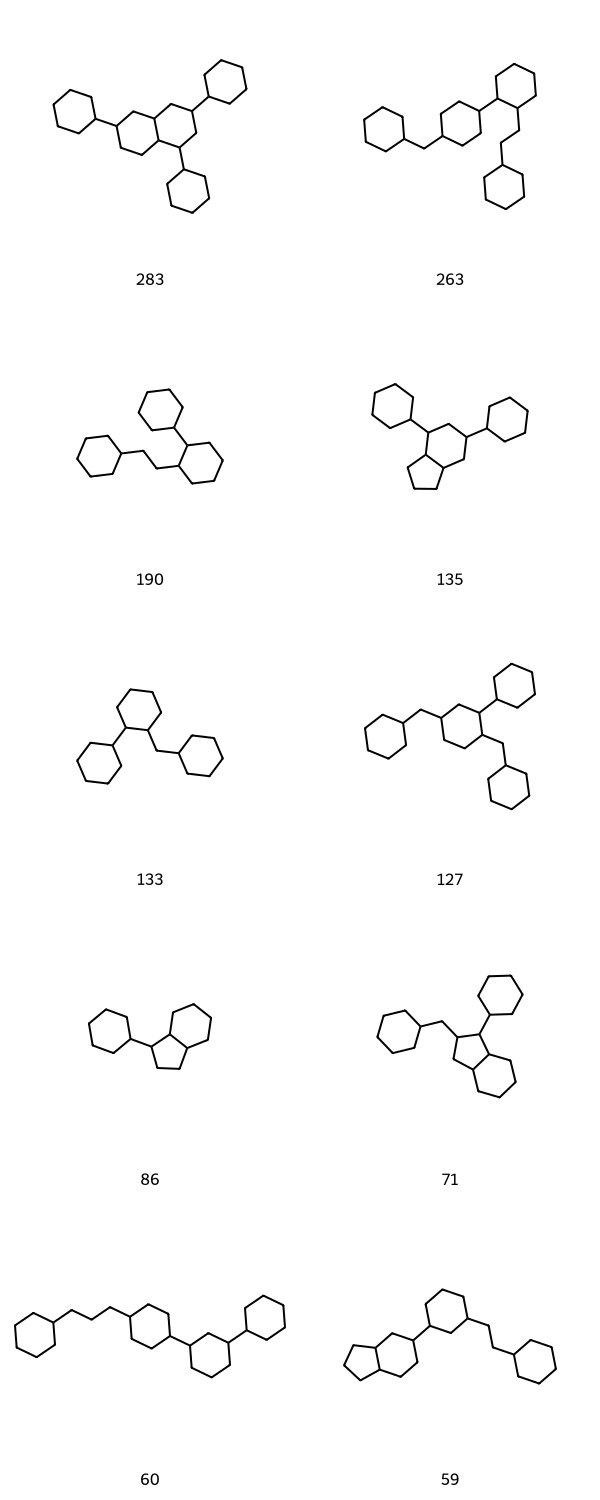

In [25]:
mtor_scaffolds_sorted = [(scaffold, len(ligands)) for scaffold, ligands in mtor_scaffolds_dict.items()]
mtor_scaffolds_sorted.sort(key=lambda x: x[1], reverse=True)

Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in mtor_scaffolds_sorted[:10]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in mtor_scaffolds_sorted[:10]])

From the visualization nof top 10 most common scaffolds in my dataset and the mtor dataset, I think its quite clear that the molecules in my dataset are a bit simpler. The presence of some steroid core is also quite frequent. 

Now I want to calculate the fingerprints of all molecules in both sets and then comapre them and see if they are similar. To assess similarity, I will be using the Tanimoto similarity measure with the threshold of 0.8 and radius of 2.

In [27]:
fpgen = AllChem.GetMorganGenerator(radius=2)
pr_fps = [fpgen.GetFingerprint(mol) for mol in df_smiles_list]
mtor_fps = [fpgen.GetFingerprint(mol) for mol in mtor]

In [28]:
def similarity_search(fp, fps, threshold = 0.8):
    similar = []
    for index, i in enumerate(fps):
        similarity = DataStructs.TanimotoSimilarity(fp, i)
        if similarity >= threshold:
            similar.append(index)
    return similar

In [29]:
similar_mols = [(index, similarity_search(pr_mol, mtor_fps)) for index, pr_mol in enumerate(pr_fps)]

relevant = [(m,ds) for m,ds in similar_mols if len(ds)]
print(len(relevant))

12


So it seems like there are 12 similar compounds between these two sets based on the Tanimoto similarity and fingerprint of radius 2. Let's look at them:

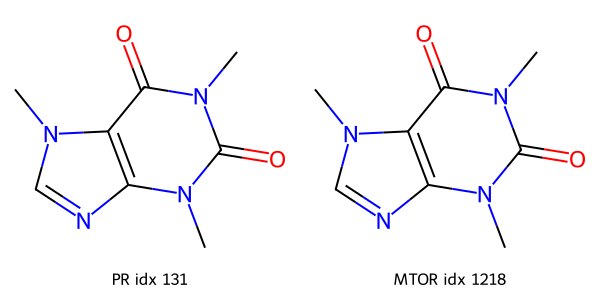

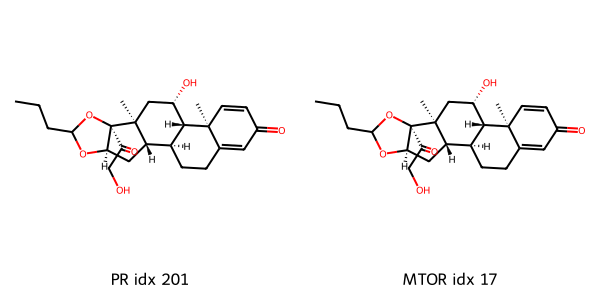

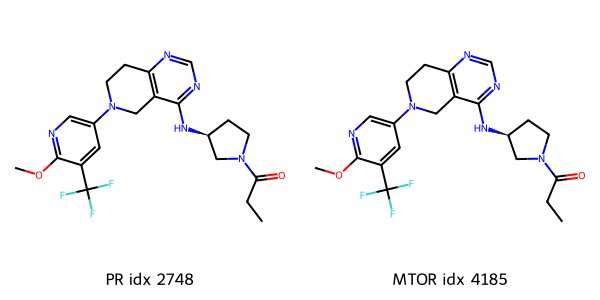

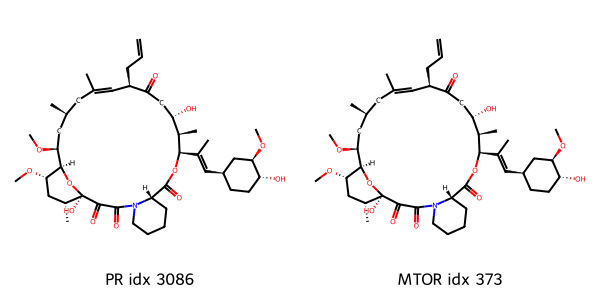

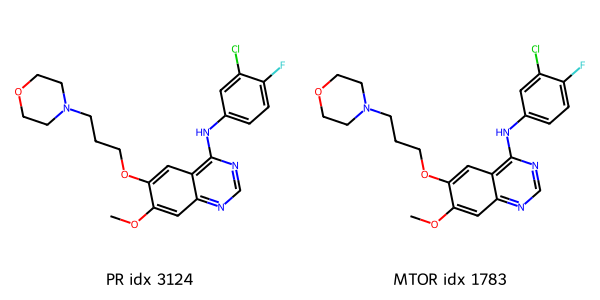

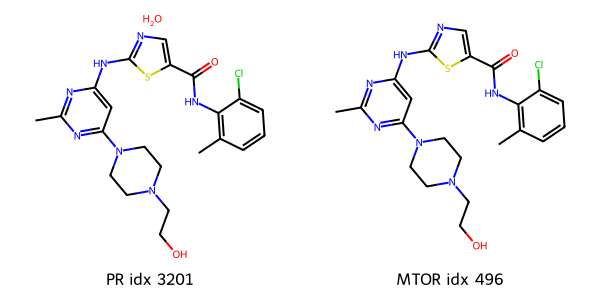

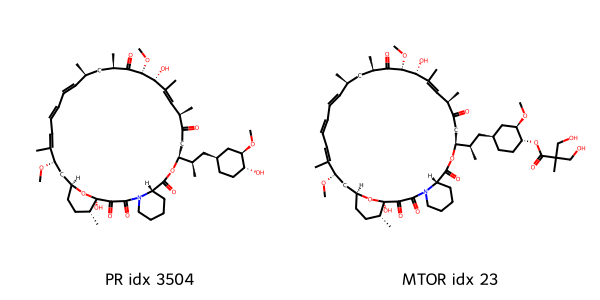

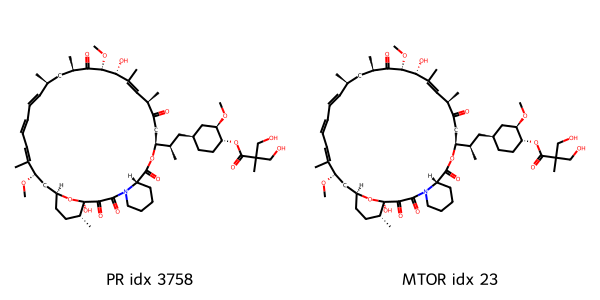

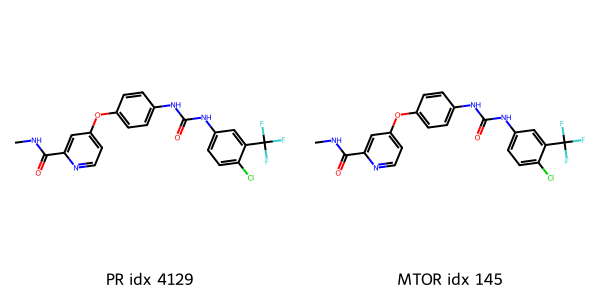

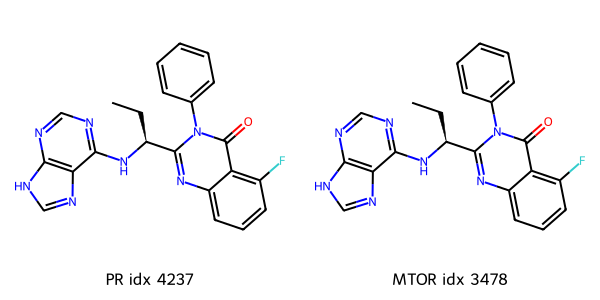

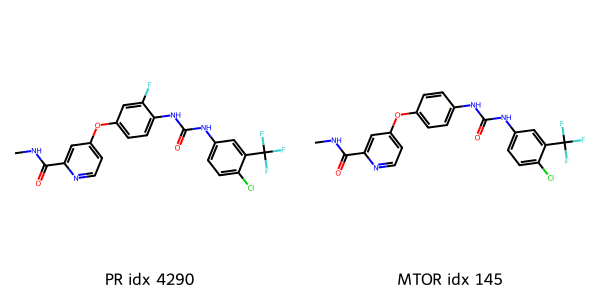

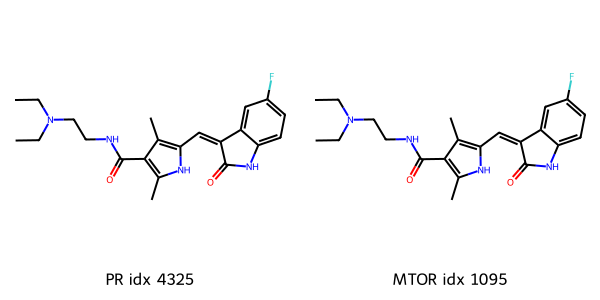

In [30]:
from rdkit.Chem.Draw import rdMolDraw2D

def show_similar_pairs(pr_mols, mtor_mols, relevant):
    pair_images = []

    for pr_idx, similar_list in relevant:
        pr_mol = pr_mols[pr_idx]
        for i, mtor_idx in enumerate(similar_list):
            if i < 1:
                mtor_mol = mtor_mols[mtor_idx]
                legends = [f'PR idx {pr_idx}', f'MTOR idx {mtor_idx}']
                img = Draw.MolsToGridImage([pr_mol, mtor_mol], molsPerRow=2, subImgSize=(300,300), legends=legends, useSVG=False)
                pair_images.append(img)

    # Display all images in Jupyter-like environments
    from IPython.display import display
    for img in pair_images:
        display(img)

show_similar_pairs(df_smiles_list, mtor, relevant)

Let's now move into visualization of these two datasets. I will be using three popular chemoinforatic methods:
- PCA
- MDS
- tSNE

In [49]:
import re

float_pattern = re.compile(r'^-?\d+(?:\.\d+)?$')

def process_dataframe(df, smiles_col, value_col, source_name):
    # Drop rows where SMILES is missing
    df = df[df[smiles_col] != -1].copy()
    
    # Add new processed columns
    df["rdmol"] = df[smiles_col].apply(Chem.MolFromSmiles)
    df["smiles"] = df[smiles_col]
    df["source"] = source_name
    
    # Convert value to float with fallback to 0
    df["pChEMBL_value"] = df[value_col].apply(
        lambda x: float(x) if float_pattern.match(str(x)) else 0
    )
    
    # Generate fingerprints
    df["fps"] = df["rdmol"].apply(
        lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) if mol else None
    )
    
    # Keep only relevant columns
    return df[["smiles", "source", "rdmol", "fps", "pChEMBL_value"]]

# Example:
# Assume df1 and df2 are loaded from CSVs or constructed already
df2_processed = process_dataframe(df_pr_smiles, "Smiles", "\"ChEMBL ID", "pr")
df1_processed = process_dataframe(df_mtor_full, "Smiles", "pChEMBL Value", "mtor")

# Combine them into one
df_combined = pd.concat([df2_processed, df1_processed], ignore_index=True)

In [50]:
from rdkit.Chem import rdMolDescriptors
df_combined = df_combined.join(pd.DataFrame((rdMolDescriptors.MQNs_(mol) for mol in df_combined["rdmol"]),
                          columns=[*(f"MQN_{x}" for x in range(1,43))])
            )

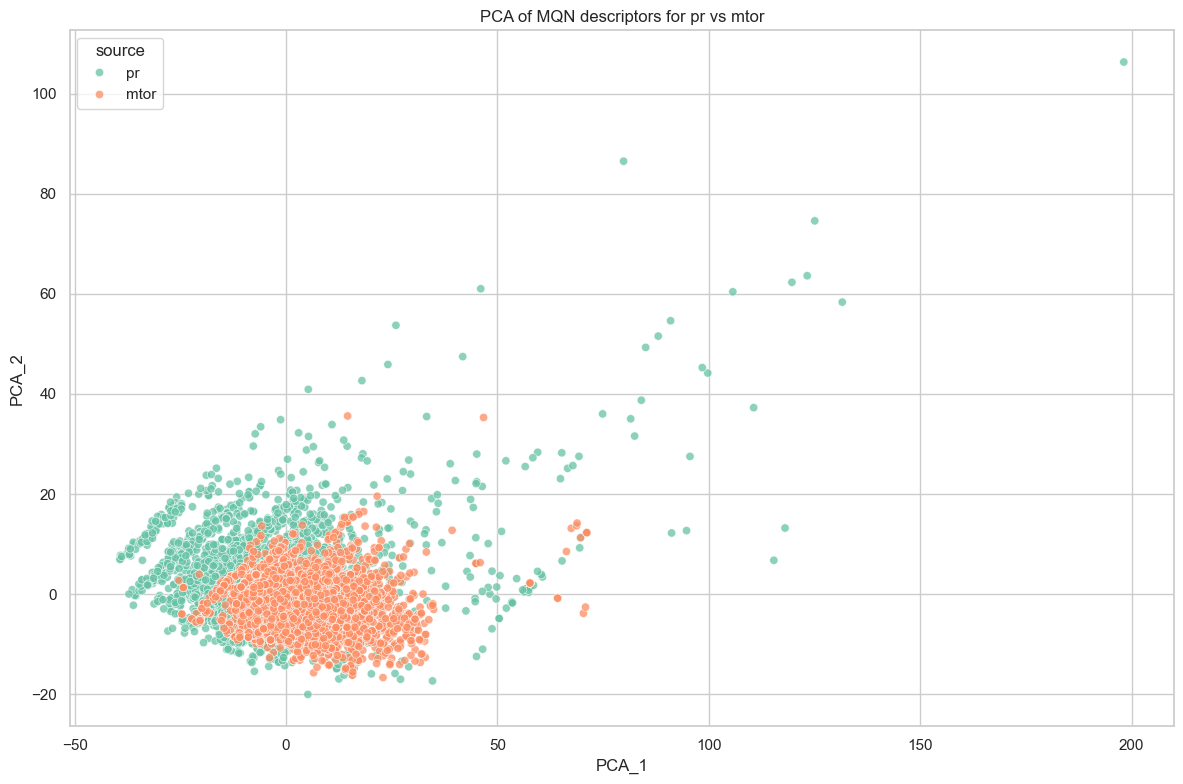

In [51]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=42)
pca.fit(df_combined[(f"MQN_{x}" for x in range(1, 43))])
df_combined = df_combined.join(pd.DataFrame(pca.transform(df_combined[(f"MQN_{x}" for x in range(1, 43))]),
                          columns=[f"PCA_{x}" for x in range(1, 43)])
            )

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x="PCA_1", y="PCA_2",
    data=df_combined,
    hue="source",
    palette="Set2",
    alpha=0.75,
    ax=ax
)
ax.set_title("PCA of MQN descriptors for pr vs mtor")
plt.tight_layout()
plt.show()

MDS

In [53]:
from scipy.spatial import distance

sparse_mat = distance.pdist(list(df_combined["fps"]),metric="jaccard")
dist_mat = distance.squareform(sparse_mat)

In [54]:
dist_mat

array([[0.        , 0.8313253 , 0.87234043, ..., 0.84      , 0.8627451 ,
        0.84337349],
       [0.8313253 , 0.        , 0.85915493, ..., 0.87654321, 0.90361446,
        0.85483871],
       [0.87234043, 0.85915493, 0.        , ..., 0.9010989 , 0.9010989 ,
        0.82352941],
       ...,
       [0.84      , 0.87654321, 0.9010989 , ..., 0.        , 0.87755102,
        0.84615385],
       [0.8627451 , 0.90361446, 0.9010989 , ..., 0.87755102, 0.        ,
        0.86075949],
       [0.84337349, 0.85483871, 0.82352941, ..., 0.84615385, 0.86075949,
        0.        ]], shape=(9216, 9216))

In [55]:
from sklearn import manifold

clf = manifold.MDS(n_components=2, n_init=1, max_iter=100, dissimilarity="precomputed")
X_mds = clf.fit_transform(dist_mat)

In [56]:
X_mds

array([[-0.46110479,  0.31156596],
       [-0.26080819, -0.62136955],
       [-0.57598128,  0.27950002],
       ...,
       [-0.04338516, -0.58565974],
       [ 0.25628686, -0.1163207 ],
       [-0.23345213, -0.48863556]], shape=(9216, 2))

In [57]:
df_combined = df_combined.join(pd.DataFrame(X_mds, columns=["mds_x","mds_y"]))

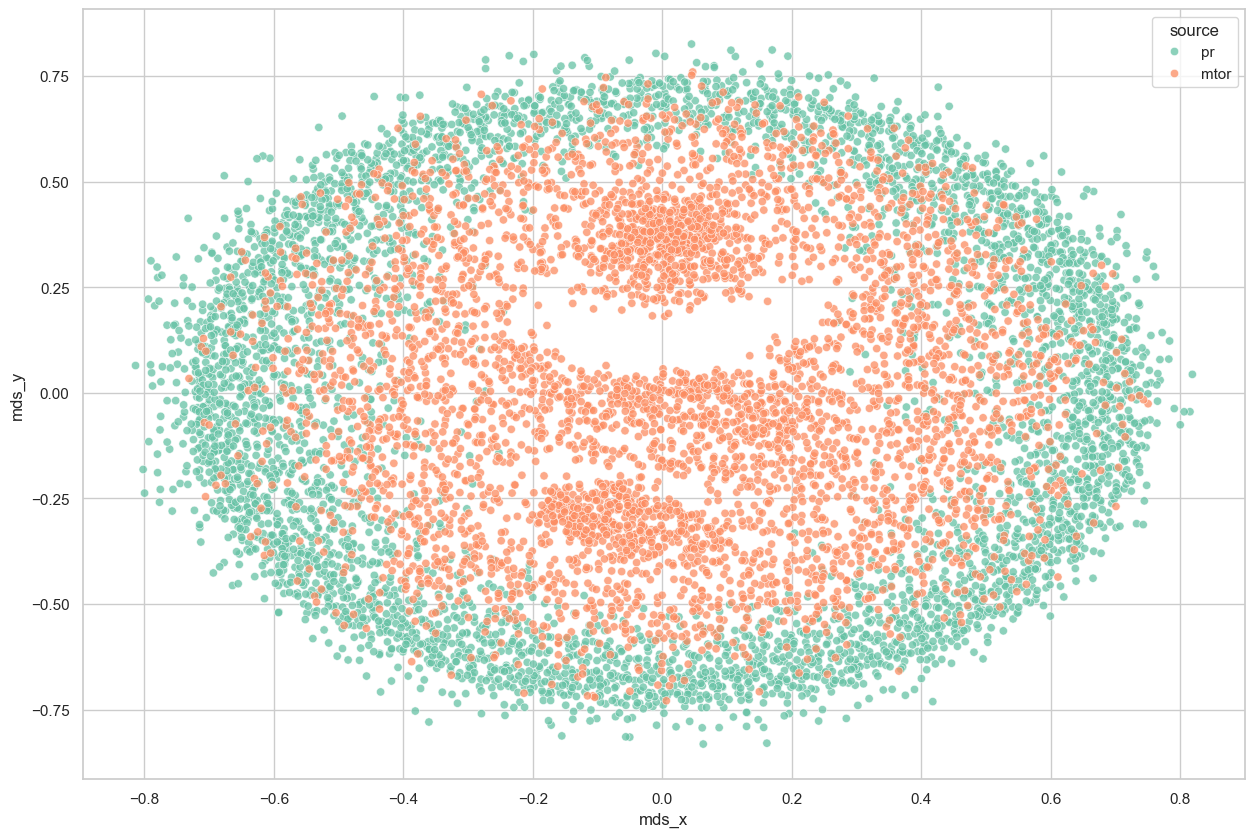

In [59]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="mds_x",
                      y="mds_y",
                      data=df_combined,
                      hue="source",
                      legend="brief",
                      ax=ax,
                      alpha=0.75,
                      palette="Set2"
                     )

It seems like this manifold method could be quite good at dividing these two data sets, they of course do overlap but the mtor data is quite clearly more towards the centre.

t-SNE

In [60]:
clf = manifold.TSNE(n_components=2, metric="precomputed", init="random")
X_tsne = clf.fit_transform(dist_mat)

In [61]:
df_combined = df_combined.join(pd.DataFrame(X_tsne, columns=["tsne_x", "tsne_y"]))

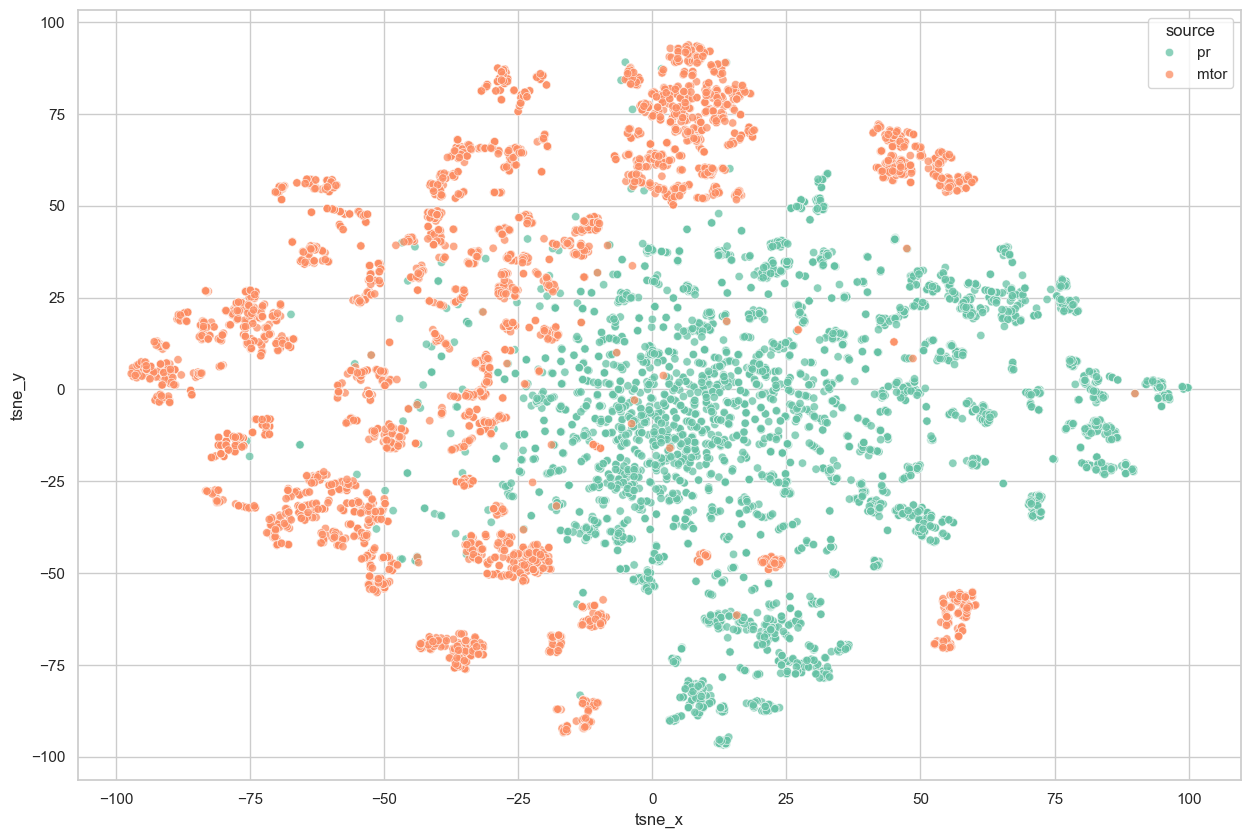

In [62]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="tsne_x",
                      y="tsne_y",
                      data=df_combined,
                      hue="source",
                      legend="brief",
                      ax=ax,
                      alpha=0.75,
                      palette="Set2"
                     )

t-SNE also seems to separate these two sources quite well.

Classifiers: trying to predict biologically active compounds out of the pr dataset

1. Random Forest Classifier

In [64]:
df_drugs = pd.read_csv("/Users/emafialova/cdd2025/drugs.csv", sep="\";\"")
df_drugs.head()

/var/folders/vs/jvlkzzgs5qng_qg2lf5q2zwr0000gn/T/ipykernel_24246/2655350551.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_drugs = pd.read_csv("/Users/emafialova/cdd2025/drugs.csv", sep="\";\"")


,"""ChEMBL ID",Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,Inchi,Withdrawn Flag,"Orphan"""
0,"""CHEMBL1200663",TECHNETIUM TC 99M LIDOFENIN,FROSSTIMAGE HIDA|TC-99M HIDA|TECHNESCAN HIDA|T...,Small molecule,4.0,393.21,NaN,NaN,NaN,NaN,...,NaN,391.0279,NaN,NaN,C14H18N2O5Tc,NaN,NaN,NaN,False,"0"""
1,"""CHEMBL2104287",DIBENZEPIN HYDROCHLORIDE,DIBENZEPIN HCL|DIBENZEPIN HYDROCHLORIDE|HF 192...,Small molecule,4.0,331.85,3.0,9.0,2.98,26.79,...,0.0,295.1685,-0.89,NEUTRAL,C18H22ClN3O,CN(C)CCN1C(=O)c2ccccc2N(C)c2ccccc21.Cl,RJPZIQRLRMWPRF-UHFFFAOYSA-N,InChI=1S/C18H21N3O.ClH/c1-19(2)12-13-21-17-11-...,False,"0"""
2,"""CHEMBL1200385",ARBUTAMINE HYDROCHLORIDE,ARBUTAMINE HCL|ARBUTAMINE HYDROCHLORIDE|GENESA...,Small molecule,4.0,353.85,NaN,NaN,2.45,92.95,...,0.0,317.1627,0.46,BASE,C18H24ClNO4,Cl.Oc1ccc(CCCCNC[C@H](O)c2ccc(O)c(O)c2)cc1,ATBUNPBAFFCFKY-FERBBOLQSA-N,InChI=1S/C18H23NO4.ClH/c20-15-7-4-13(5-8-15)3-...,False,"0"""
3,"""CHEMBL1200529",COBALTOUS CHLORIDE CO 57,"57CO|COBALT CHLORIDE, CO-57|COBALTOUS CHLORIDE...",Small molecule,4.0,127.84,NaN,NaN,NaN,NaN,...,NaN,128.8709,NaN,NaN,Cl2Co,NaN,NaN,NaN,False,"0"""
4,"""CHEMBL3833361",PROMETHAZINE TEOCLATE,AVOMINE|PROMETHAZINE TEOCLATE,Small molecule,4.0,499.04,NaN,NaN,NaN,NaN,...,NaN,498.1605,NaN,NaN,C24H27ClN6O2S,CC(CN1c2ccccc2Sc2ccccc21)N(C)C.Cn1c(=O)c2[nH]c...,YCXARMXCESBEDS-UHFFFAOYSA-N,InChI=1S/C17H20N2S.C7H7ClN4O2/c1-13(18(2)3)12-...,False,"0"""


In [67]:
df_drugs2 = df_drugs.fillna(-1)
# Filter rows where the "Smiles" column is NOT equal to -1
df_drugs2_final = df_drugs2[df_drugs2["Smiles"] != -1]
df_drugs2_final

,"""ChEMBL ID",Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,Inchi,Withdrawn Flag,"Orphan"""
1,"""CHEMBL2104287",DIBENZEPIN HYDROCHLORIDE,DIBENZEPIN HCL|DIBENZEPIN HYDROCHLORIDE|HF 192...,Small molecule,4.0,331.85,3.0,9.0,2.98,26.79,...,0.0,295.1685,-0.89,NEUTRAL,C18H22ClN3O,CN(C)CCN1C(=O)c2ccccc2N(C)c2ccccc21.Cl,RJPZIQRLRMWPRF-UHFFFAOYSA-N,InChI=1S/C18H21N3O.ClH/c1-19(2)12-13-21-17-11-...,False,"0"""
2,"""CHEMBL1200385",ARBUTAMINE HYDROCHLORIDE,ARBUTAMINE HCL|ARBUTAMINE HYDROCHLORIDE|GENESA...,Small molecule,4.0,353.85,-1.0,-1.0,2.45,92.95,...,0.0,317.1627,0.46,BASE,C18H24ClNO4,Cl.Oc1ccc(CCCCNC[C@H](O)c2ccc(O)c(O)c2)cc1,ATBUNPBAFFCFKY-FERBBOLQSA-N,InChI=1S/C18H23NO4.ClH/c20-15-7-4-13(5-8-15)3-...,False,"0"""
4,"""CHEMBL3833361",PROMETHAZINE TEOCLATE,AVOMINE|PROMETHAZINE TEOCLATE,Small molecule,4.0,499.04,-1.0,-1.0,-1.00,-1.00,...,-1.0,498.1605,-1.00,-1,C24H27ClN6O2S,CC(CN1c2ccccc2Sc2ccccc21)N(C)C.Cn1c(=O)c2[nH]c...,YCXARMXCESBEDS-UHFFFAOYSA-N,InChI=1S/C17H20N2S.C7H7ClN4O2/c1-13(18(2)3)12-...,False,"0"""
5,"""CHEMBL3833408",MAGALDRATE,AY-5710|MAGALDRATE,Small molecule,4.0,1097.30,-1.0,-1.0,-1.00,-1.00,...,-1.0,1093.7465,-1.00,-1,H31Al5Mg10O39S2,O=S(=O)([O-])[O-].O=S(=O)([O-])[O-].[Al+3].[Al...,NNGFFDRXGAELQA-UHFFFAOYSA-A,InChI=1S/5Al.10Mg.2H2O4S.31H2O/c;;;;;;;;;;;;;;...,False,"0"""
6,"""CHEMBL3039567",SODIUM GLYCEROPHOSPHATE,SODIUM GLYCEROPHOSPHATE|SODIUM GLYCEROPHOSPHAT...,Small molecule,4.0,234.05,-1.0,-1.0,-1.00,-1.00,...,-1.0,215.9776,-1.00,-1,C3H9Na2O7P,O.O=P(O)(O)OCC([O-])C[O-].[Na+].[Na+],LBDWSTFIMYEJKD-UHFFFAOYSA-N,"InChI=1S/C3H7O6P.2Na.H2O/c4-1-3(5)2-9-10(6,7)8...",False,"0"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669,"""CHEMBL1699",MEMANTINE HYDROCHLORIDE,ACRESCENT|AKATINOL|AUXURA|BALAXUR|EBIXA|FP-01|...,Small molecule,4.0,215.77,31.0,56.0,2.69,26.02,...,0.0,179.1674,0.53,BASE,C12H22ClN,CC12CC3CC(C)(C1)CC(N)(C3)C2.Cl,LDDHMLJTFXJGPI-UHFFFAOYSA-N,"InChI=1S/C12H21N.ClH/c1-10-3-9-4-11(2,6-10)8-1...",False,"0"""
3670,"""CHEMBL1331216",HYOSCYAMINE,(-)-ATROPINE|(-)-HYOSCYAMINE|(S)-(-)-HYOSCYAMI...,Small molecule,4.0,289.37,70.0,87.0,1.93,49.77,...,0.0,289.1678,0.79,BASE,C17H23NO3,CN1[C@@H]2CC[C@H]1C[C@@H](OC(=O)[C@H](CO)c1ccc...,RKUNBYITZUJHSG-FXUDXRNXSA-N,InChI=1S/C17H23NO3/c1-18-13-7-8-14(18)10-15(9-...,False,"0"""
3671,"""CHEMBL4164059",PITOLISANT HYDROCHLORIDE,CIPROXIDINE|Ozawade|PITOLISANT HYDROCHLORIDE|W...,Small molecule,4.0,332.31,31.0,62.0,4.17,12.47,...,0.0,295.1703,-1.15,BASE,C17H27Cl2NO,Cl.Clc1ccc(CCCOCCCN2CCCCC2)cc1,XLFKECRRMPOAQS-UHFFFAOYSA-N,InChI=1S/C17H26ClNO.ClH/c18-17-9-7-16(8-10-17)...,False,"0"""
3672,"""CHEMBL509",MECLOFENAMIC ACID,CI-583|CL-583|INF 4668|INF-4668|MECLOFENAMATE|...,Small molecule,4.0,296.15,160.0,460.0,4.74,49.33,...,0.0,295.0167,-0.98,ACID,C14H11Cl2NO2,Cc1ccc(Cl)c(Nc2ccccc2C(=O)O)c1Cl,SBDNJUWAMKYJOX-UHFFFAOYSA-N,InChI=1S/C14H11Cl2NO2/c1-8-6-7-10(15)13(12(8)1...,False,"0"""


In [69]:
# Assume df1 and df2 are loaded from CSVs or constructed already
df2_processed = process_dataframe(df_pr_smiles, "Smiles", "\"ChEMBL ID", "pr")
df3_processed = process_dataframe(df_drugs2_final, "Smiles", "\"ChEMBL ID", "drugs")

# Combine them into one
df_combined_final = pd.concat([df2_processed, df3_processed], ignore_index=True)

In [70]:
from rdkit.Chem import rdMolDescriptors
df_combined_final = df_combined_final.join(pd.DataFrame((rdMolDescriptors.MQNs_(mol) for mol in df_combined_final["rdmol"]),
                          columns=[*(f"MQN_{x}" for x in range(1,43))])
            )

In [71]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn import ensemble
from sklearn import model_selection as ms
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [ ]:
def get_results(model, data, descriptors, predicted_value):
    res = pd.DataFrame(model.predict(data[descriptors])).join(data[[predicted_value, "source"]])
    res.columns = ["Prediction", predicted_value, "Source"]
    avg_error_whole = (res["Prediction"]-res[predicted_value]).abs().mean()
    avg_error_pr = (res[res["Source"]=="chembl_cox2"]["Prediction"]-res[res["Source"]=="chembl_cox2"][predicted_value]).abs().mean()
    print(f"""Average error whole set: {avg_error_whole}
    Average error pr: {avg_error_pr}""")
    return res

Firstly I will split the data into train and test set:

In [77]:
trainset, testset = ms.train_test_split(df_combined_final[df_combined_final["source"]=="pr"])
trainset.reset_index(inplace=True)
testset.reset_index(inplace=True)

In [78]:
model_svr = SVR()
model_svr.fit(trainset[(f"MQN_{x}" for x in range(1, 43))], trainset["pChEMBL_value"])

SVR()

In [79]:
res = get_results(model_svr, df_combined_final, (f"MQN_{x}" for x in range(1, 43)), "Standard Value")

KeyError: "['Standard Value'] not in index"